# Dossier Klimawandel

## Einleitung

Dieses Dossier soll die wichtigsten Fakten über den Klimawandel zusammentragen. Es hat nicht die Aufgabe, zu belegen, dass der Klimawandel menschengemacht ist – dieser Umstand ist wissenschaftlich belegt. Vielmehr sollen die hier präsentierten Zahlen und Fakten.

Der Schwerpunkt des Dossiers liegt darin, Klarheit in die Diskussion zu bringen:

 * Präsentation von Daten aus **Primärquellen**
 * Sofern vorhanden Verweise auf sekundäre Quellen **zur Vertiefung**
 * Dokumentation der **Methoden der Aufbereitung**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 4]
pd.options.display.max_columns = None

## Globale Situation

### CO₂-Emissionen

#### Jährlicher CO₂-Ausstoss weltweit

Millionen Tonnen pro Jahr

Quelle: [Carbon Atlas](http://www.globalcarbonatlas.org/en/CO2-emissions)

/Users/amoor/bin/miniconda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/amoor/bin/miniconda/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


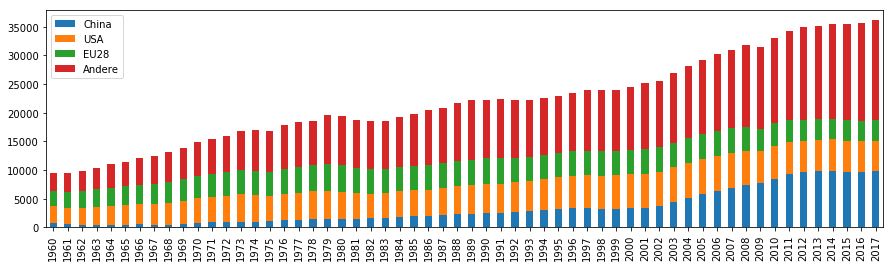

In [137]:
emissions = pd.read_csv('./datasets/mtco2_export_20190625_1204.csv', sep=';', skiprows=1, skipfooter=2, engine='python', index_col=0)
emissions_selected = emissions[['China', 'United States of America', 'EU28']]
emissions_selected.loc[:,'Andere'] = emissions['World'] - emissions_selected.sum(axis=1)
emissions_selected = emissions_selected.rename(columns={'United States of America': 'USA'})
emissions_selected.plot(kind='bar', stacked=True);

In [138]:
# reformat data for display in chart
def format_csv(df):
    rows = []
    for index, row in df.iterrows():
        for item in row.iteritems():
            key, val = item
            rows.append([index,key,val])
    return rows

emissions_display = pd.DataFrame(format_csv(emissions_selected), columns=['year','label','value'])
emissions_display.to_csv('./emissions_global.csv', float_format='%.4f', index=False)

### Globaler Temperaturanstieg seit der Industrialisierung

Abweichung vom langjährigen Durchschnitt 1951–1980

Quelle: NASA ([Website](https://climate.nasa.gov/vital-signs/global-temperature/), [Rohdaten](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt))

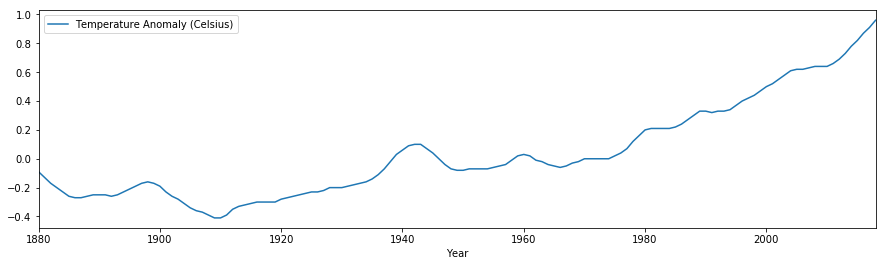

In [139]:
warming = pd.read_csv('./datasets/Global_Mean_Estimates_based_on_Land_and_Ocean_Data.txt', skiprows=[0,1,2,4], sep='\s+')
warming.rename(columns={"Lowess(5)": "Temperature Anomaly (Celsius)"}, inplace=True)
warming_display = pd.DataFrame(warming[['Year', 'Temperature Anomaly (Celsius)']].values, columns=['year', 'value'])
warming_display['year'] = warming_display['year'].astype('int32')
warming_display.to_csv('./warming.csv', index=False)
warming.plot(kind='line', x='Year', y='Temperature Anomaly (Celsius)')
plt.show()

## Schweiz

#### Wie gut schneidet die Schweiz ab im Vergleich mit den unmittelbaren Nachbarn?

Tonnen CO₂ pro Einwohner pro Jahr

Quelle: [Carbon Atlas](http://www.globalcarbonatlas.org/en/CO2-emissions)

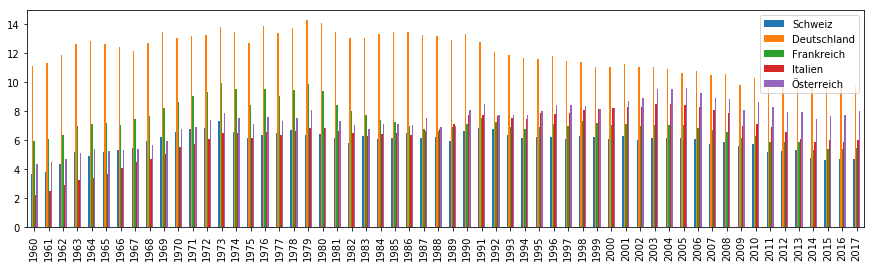

In [148]:
tco2_per_capita = pd.read_csv('./datasets/tco2_per_capita_export_20190625_1220.csv', sep=';', skiprows=1, skipfooter=3, engine='python', index_col=0)
tco2_per_capita_ch = tco2_per_capita[['Switzerland', 'Germany', 'France', 'Italy', 'Austria']]
tco2_per_capita_ch.rename(columns={'Switzerland': 'Schweiz', 'Germany': 'Deutschland', 'Italy': 'Italien', 'Austria': 'Österreich', 'France': 'Frankreich'}, inplace=True)
tco2_per_capita_ch_selected = tco2_per_capita_ch.loc[:]
tco2_per_capita_ch_selected.plot(kind='bar');

In [149]:
tco2_per_capita_ch_display = pd.DataFrame(format_csv(tco2_per_capita_ch_selected), columns=['year','label','value'])
tco2_per_capita_ch_display.to_csv('./emissions_ch.csv', float_format='%.4f', index=False)
